In [1]:
# importing libraries
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

dataloader = torch.utils.data.DataLoader(dataset,
                                            batch_size=64,
                                            shuffle=True)

In [3]:
image, label = next(iter(dataloader))

print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [4]:
class AE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super(AE, self).__init__()

        input_dim = input_shape[1] * input_shape[2]

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*7*7, latent_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64*7*7),
            nn.ReLU(),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
        

   
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x


In [5]:
model = AE(input_shape=(1, 28, 28), latent_dim=2)

print(model)

AE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=3136, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=3136, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(64, 7, 7))
    (3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (6): Sigmoid()
  )
)


In [6]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in dataloader:
       
      # Output of Autoencoder
      reconstructed = model(image)
       
      # Calculating the loss function
      loss = loss_fn(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    outputs.append((epochs, image, reconstructed))


Epoch [1/20], Loss: 0.1950
Epoch [2/20], Loss: 0.1923
Epoch [3/20], Loss: 0.2048
Epoch [4/20], Loss: 0.2023
Epoch [5/20], Loss: 0.1901
Epoch [6/20], Loss: 0.1920
Epoch [7/20], Loss: 0.1861
Epoch [8/20], Loss: 0.2162
Epoch [9/20], Loss: 0.1999
Epoch [10/20], Loss: 0.1895
Epoch [11/20], Loss: 0.1822
Epoch [12/20], Loss: 0.1904
Epoch [13/20], Loss: 0.1974
Epoch [14/20], Loss: 0.1797
Epoch [15/20], Loss: 0.1836
Epoch [16/20], Loss: 0.2016
Epoch [17/20], Loss: 0.1989
Epoch [18/20], Loss: 0.2003
Epoch [19/20], Loss: 0.2038
Epoch [20/20], Loss: 0.2067


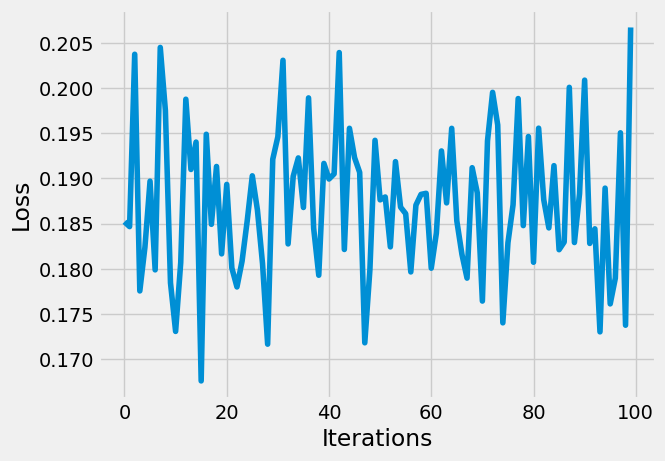

In [8]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
losses = [i.detach().numpy() for i in losses]

# Plotting the last 100 values
plt.plot(losses[-100:])

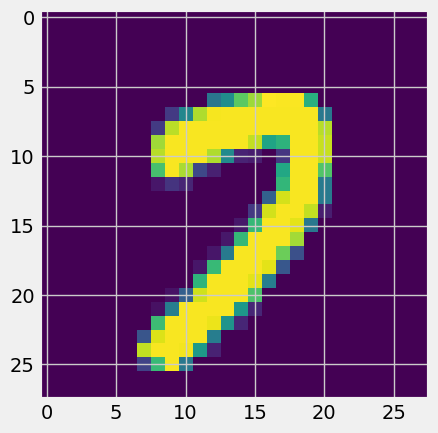

In [9]:
for i, item in enumerate(image):
   
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])


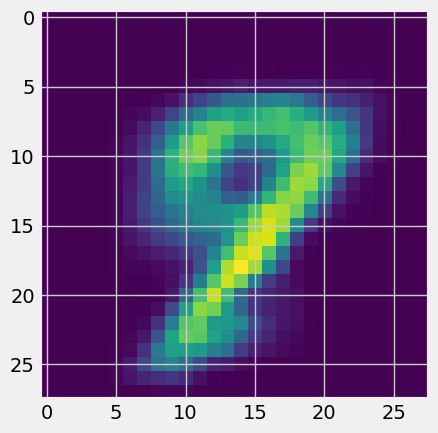

In [10]:
 
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28).detach().numpy()
  plt.imshow(item[0])